In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR

In [2]:
#read excel using pandas
ls_df = pd.read_excel(r"C:\Users\abhiram\OneDrive - Oklahoma A and M System\Oklahoma State University\GRA\Water quality monitoring\GRDA\Grand lake\GRDA_Grand_reorganized.xlsx")

In [3]:
#Gives info about entire dataframe
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Reservoir                                        2840 non-null   object        
 1   Site ID                                          2840 non-null   object        
 2   Lat                                              2840 non-null   float64       
 3   Long                                             2840 non-null   float64       
 4   Sampling Date                                    2840 non-null   datetime64[ns]
 5   Chlo-a (µg/L)                                    2835 non-null   float64       
 6   Turbidity                                        2709 non-null   float64       
 7   Coastal Aerosol (B1)-(0.43-0.45 µm)              2826 non-null   float64       
 8   Blue (B2)-(0.45-0.51 µm)              

In [4]:
#checking the null values in the dataframe
ls_df.isnull().sum()

Reservoir                                          6110
Site ID                                            6110
Lat                                                6110
Long                                               6110
Sampling Date                                      6110
Chlo-a (µg/L)                                      6115
Turbidity                                          6241
Coastal Aerosol (B1)-(0.43-0.45 µm)                6124
Blue (B2)-(0.45-0.51 µm)                           6124
Green (B3)-(0.53-0.59 µm)                          6124
Red (B4)-(0.64-0.67 µm)                            6124
NIR (B5)-(0.85-0.88 µm)                            6124
SWIR1 (B6)-(1.57-1.65 µm)                          6124
SWIR2 (B7)-(2.11-2.29 µm)                          6124
Panchromatic (B8)-(0.5-0.68 µm)                    6124
Cirrus (B9)-(1.36-1.38 µm)                         6124
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)    6124
Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm) 

In [5]:
#Drop null values if there are any
ls_df.dropna(inplace = True)
#After dropping null values checking the dataframe again
ls_df.isnull().sum()

Reservoir                                          0
Site ID                                            0
Lat                                                0
Long                                               0
Sampling Date                                      0
Chlo-a (µg/L)                                      0
Turbidity                                          0
Coastal Aerosol (B1)-(0.43-0.45 µm)                0
Blue (B2)-(0.45-0.51 µm)                           0
Green (B3)-(0.53-0.59 µm)                          0
Red (B4)-(0.64-0.67 µm)                            0
NIR (B5)-(0.85-0.88 µm)                            0
SWIR1 (B6)-(1.57-1.65 µm)                          0
SWIR2 (B7)-(2.11-2.29 µm)                          0
Panchromatic (B8)-(0.5-0.68 µm)                    0
Cirrus (B9)-(1.36-1.38 µm)                         0
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)    0
Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)    0
dtype: int64

In [6]:
#creating a new dataframe to drop columns
dc = pd.DataFrame()

#dropped unnencessary columns for regression
dc = ls_df.drop(columns = ["Reservoir","Site ID", "Lat", "Long", "Sampling Date", ], axis = 1)

dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 0 to 2713
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Chlo-a (µg/L)                                    2707 non-null   float64
 1   Turbidity                                        2707 non-null   float64
 2   Coastal Aerosol (B1)-(0.43-0.45 µm)              2707 non-null   float64
 3   Blue (B2)-(0.45-0.51 µm)                         2707 non-null   float64
 4   Green (B3)-(0.53-0.59 µm)                        2707 non-null   float64
 5   Red (B4)-(0.64-0.67 µm)                          2707 non-null   float64
 6   NIR (B5)-(0.85-0.88 µm)                          2707 non-null   float64
 7   SWIR1 (B6)-(1.57-1.65 µm)                        2707 non-null   float64
 8   SWIR2 (B7)-(2.11-2.29 µm)                        2707 non-null   float64
 9   Panchromatic (B8)-(0.5-0.68 µm

In [7]:
dc = dc.where(dc["Turbidity"] > 0)
dc = dc.where(dc["Turbidity"] <100)
dc = dc.where(dc["Coastal Aerosol (B1)-(0.43-0.45 µm)"] < 20000)

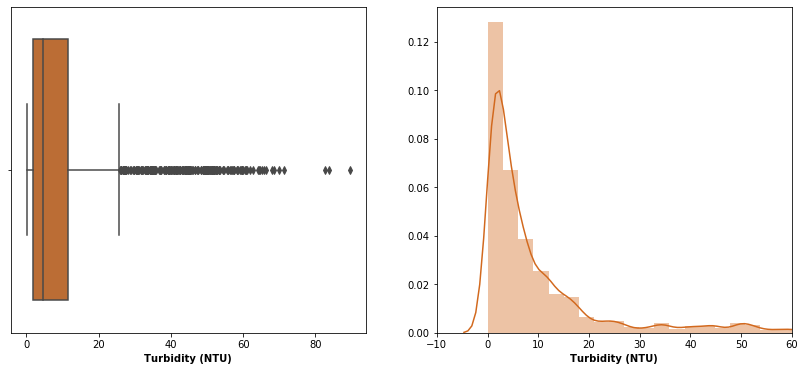

In [58]:
#Turbidity distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
ax1 = sns.boxplot(dc["Turbidity"], color = 'chocolate')
plt.subplot(122)
ax2 = sns.distplot(dc["Turbidity"], bins=30, color = 'chocolate')
ax1.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax2.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax2.set_xlim(-10,60)
plt.savefig("turb_dist.tif", dpi = 300)
#plt.show()

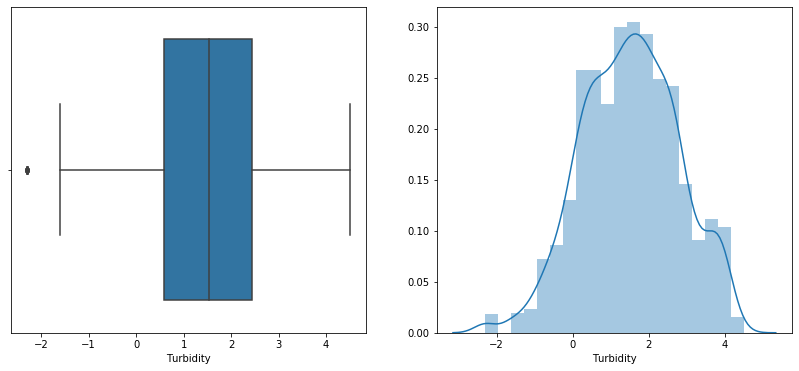

In [9]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(np.log(dc["Turbidity"]))
plt.subplot(122)
sns.distplot(np.log(dc["Turbidity"]), bins=20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D94C5CA888>,
      dtype=object)

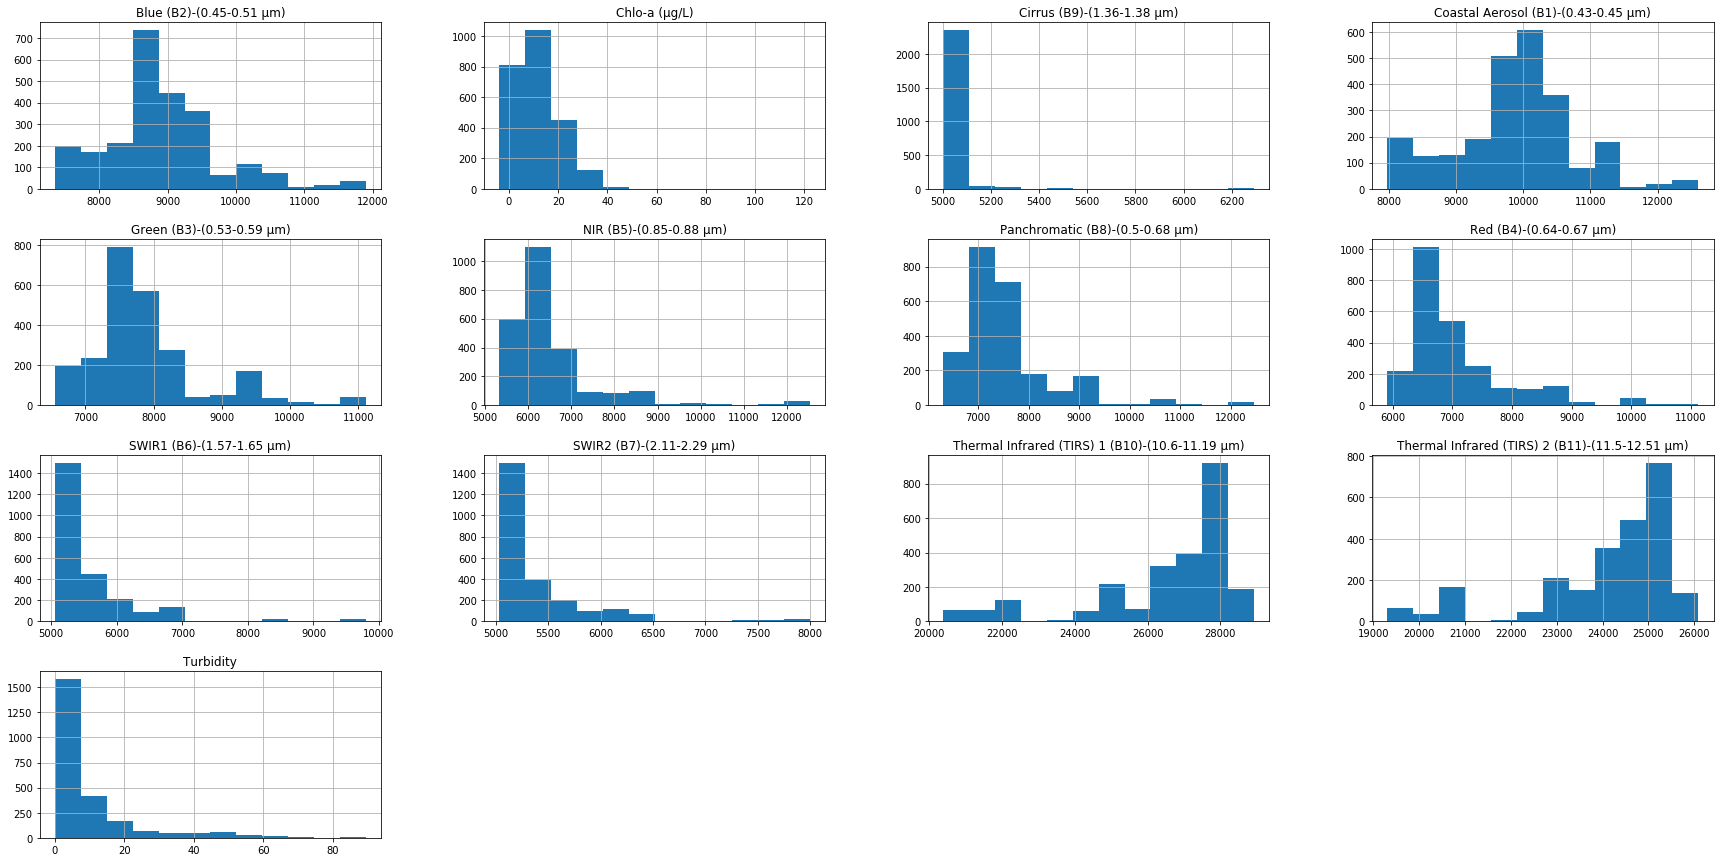

In [10]:
dc.hist(figsize = (30,15), bins = 12)

In [11]:
#dc["Turbidity"] = np.log(dc["Turbidity"])

In [12]:
dc.describe()

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.00000,2436.000000,2436.00000,2436.000000,2436.000000,2436.000000,2436.000000
mean,11.976724,9.544869,9862.842365,8909.757389,7872.667898,7056.579639,6489.54844,5629.429392,5413.17734,7567.738506,5049.353448,26569.366995,24059.847701
std,8.839729,12.878774,885.606047,820.749246,830.951093,838.081378,1076.36030,683.492340,460.00502,894.370305,87.861293,2007.096687,1524.499673
min,-3.900000,0.100000,7973.000000,7355.000000,6558.000000,5915.000000,5332.00000,5059.000000,5033.00000,6311.000000,5003.000000,20383.000000,19312.000000
25%,5.700000,1.800000,9220.000000,8535.000000,7430.000000,6557.750000,5966.00000,5281.000000,5164.00000,7100.000000,5029.000000,25836.000000,23557.000000
50%,9.600000,4.600000,9927.000000,8822.000000,7688.500000,6750.000000,6181.00000,5366.000000,5236.00000,7330.000000,5036.000000,27286.000000,24517.000000
75%,16.800000,11.400000,10391.000000,9304.000000,8100.000000,7236.000000,6727.00000,5746.000000,5465.00000,7807.000000,5047.000000,27977.000000,25067.000000
max,122.200000,89.500000,12604.000000,11895.000000,11109.000000,11118.000000,12529.00000,9796.000000,7998.00000,12463.000000,6292.000000,28928.000000,26082.000000


In [13]:
dc = dc.dropna()
dc

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)
0,6.8,38.6,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
1,7.8,40.3,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
2,7.0,41.5,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
3,6.5,42.4,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
4,7.4,42.2,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,5.9,12.2,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2710,5.5,17.7,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2711,5.5,15.7,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2712,6.0,17.5,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0


In [14]:
dc["IR"] = (dc["SWIR1 (B6)-(1.57-1.65 µm)"] + dc["SWIR2 (B7)-(2.11-2.29 µm)"])/dc["NIR (B5)-(0.85-0.88 µm)"]
dc.head()

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),IR
0,6.8,38.6,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
1,7.8,40.3,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
2,7.0,41.5,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
3,6.5,42.4,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
4,7.4,42.2,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798


In [15]:
corr = dc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),IR
Chlo-a (µg/L),1.00,-0.15,0.09,0.02,-0.06,-0.14,-0.09,-0.15,-0.16,-0.10,-0.03,0.35,0.34,-0.08
Turbidity,-0.15,1.00,0.05,0.14,0.31,0.46,0.17,0.15,0.18,0.32,-0.03,-0.35,-0.34,-0.12
Coastal Aerosol (B1)-(0.43-0.45 µm),0.09,0.05,1.00,0.98,0.89,0.76,0.84,0.75,0.73,0.85,0.33,0.55,0.51,-0.87
Blue (B2)-(0.45-0.51 µm),0.02,0.14,0.98,1.00,0.95,0.86,0.90,0.82,0.81,0.92,0.36,0.41,0.37,-0.87
Green (B3)-(0.53-0.59 µm),-0.06,0.31,0.89,0.95,1.00,0.96,0.89,0.86,0.86,0.98,0.29,0.20,0.18,-0.76
Red (B4)-(0.64-0.67 µm),-0.14,0.46,0.76,0.86,0.96,1.00,0.86,0.84,0.86,0.96,0.26,0.02,-0.00,-0.69
NIR (B5)-(0.85-0.88 µm),-0.09,0.17,0.84,0.90,0.89,0.86,1.00,0.96,0.94,0.92,0.46,0.20,0.14,-0.83
SWIR1 (B6)-(1.57-1.65 µm),-0.15,0.15,0.75,0.82,0.86,0.84,0.96,1.00,0.99,0.90,0.39,0.10,0.07,-0.64
SWIR2 (B7)-(2.11-2.29 µm),-0.16,0.18,0.73,0.81,0.86,0.86,0.94,0.99,1.00,0.89,0.38,0.09,0.06,-0.59
Panchromatic (B8)-(0.5-0.68 µm),-0.10,0.32,0.85,0.92,0.98,0.96,0.92,0.90,0.89,1.00,0.31,0.12,0.08,-0.75


In [16]:
#drop the columns of the dependent variables and independent variables
X = dc.drop(columns = ["Chlo-a (µg/L)", "Turbidity", "Panchromatic (B8)-(0.5-0.68 µm)" , "Blue (B2)-(0.45-0.51 µm)", "Green (B3)-(0.53-0.59 µm)",  "Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)", "IR"])
#Including necessary dependent variable
y = dc[["Turbidity"]]

In [17]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,Coastal Aerosol (B1)-(0.43-0.45 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)
Coastal Aerosol (B1)-(0.43-0.45 µm),1.00,0.76,0.84,0.75,0.73,0.33,0.55
Red (B4)-(0.64-0.67 µm),0.76,1.00,0.86,0.84,0.86,0.26,0.02
NIR (B5)-(0.85-0.88 µm),0.84,0.86,1.00,0.96,0.94,0.46,0.20
SWIR1 (B6)-(1.57-1.65 µm),0.75,0.84,0.96,1.00,0.99,0.39,0.10
SWIR2 (B7)-(2.11-2.29 µm),0.73,0.86,0.94,0.99,1.00,0.38,0.09
Cirrus (B9)-(1.36-1.38 µm),0.33,0.26,0.46,0.39,0.38,1.00,-0.04
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),0.55,0.02,0.20,0.10,0.09,-0.04,1.00


In [18]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2713
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Coastal Aerosol (B1)-(0.43-0.45 µm)              2436 non-null   float64
 1   Red (B4)-(0.64-0.67 µm)                          2436 non-null   float64
 2   NIR (B5)-(0.85-0.88 µm)                          2436 non-null   float64
 3   SWIR1 (B6)-(1.57-1.65 µm)                        2436 non-null   float64
 4   SWIR2 (B7)-(2.11-2.29 µm)                        2436 non-null   float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       2436 non-null   float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  2436 non-null   float64
dtypes: float64(7)
memory usage: 152.2 KB


In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2713
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  2436 non-null   float64
dtypes: float64(1)
memory usage: 38.1 KB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 1400 to 904
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Coastal Aerosol (B1)-(0.43-0.45 µm)              1705 non-null   float64
 1   Red (B4)-(0.64-0.67 µm)                          1705 non-null   float64
 2   NIR (B5)-(0.85-0.88 µm)                          1705 non-null   float64
 3   SWIR1 (B6)-(1.57-1.65 µm)                        1705 non-null   float64
 4   SWIR2 (B7)-(2.11-2.29 µm)                        1705 non-null   float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       1705 non-null   float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  1705 non-null   float64
dtypes: float64(7)
memory usage: 106.6 KB


In [23]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 1400 to 904
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  1705 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 2155 to 20
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Coastal Aerosol (B1)-(0.43-0.45 µm)              731 non-null    float64
 1   Red (B4)-(0.64-0.67 µm)                          731 non-null    float64
 2   NIR (B5)-(0.85-0.88 µm)                          731 non-null    float64
 3   SWIR1 (B6)-(1.57-1.65 µm)                        731 non-null    float64
 4   SWIR2 (B7)-(2.11-2.29 µm)                        731 non-null    float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       731 non-null    float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  731 non-null    float64
dtypes: float64(7)
memory usage: 45.7 KB


In [25]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 2155 to 20
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [26]:
#calling the model and fitting the data points
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = lm.predict(X_test)

In [28]:
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
print(lm.coef_)

[9.47265811]
[[-8.59063952 19.19241425  0.50867656 -4.43642859 -4.01889605  0.5101895
   0.56105291]]


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.57044053792874
Mean Squared Error: 93.09483263801349
Root Mean Squared Error: 9.648566351433434


In [30]:
y_pred_train = lm.predict(X_train)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 5.2338287375329084
Mean Squared Error: 72.5425542488956
Root Mean Squared Error: 8.517191687927166


In [32]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [33]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.4,9.494227
1,9.5,3.199708
2,68.1,3.363466
3,46.6,40.648552
4,4.4,2.929111
...,...,...
726,47.5,43.155784
727,12.0,6.532687
728,2.6,2.819756
729,2.3,2.949136


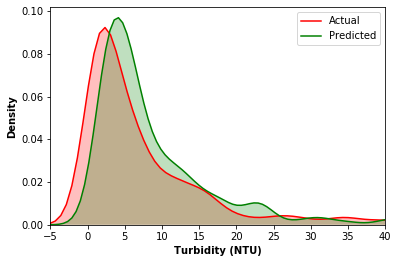

In [59]:
ax = sns.kdeplot(df["Actual"], shade=True, color="r")
ay = sns.kdeplot(df["Predicted"], shade=True, color="g")
ax.set_xlim(-5,40)
ax.set_xlabel("Turbidity (NTU)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
plt.savefig("figure6_2.tif", dpi = 300)

In [35]:
cls = RandomForestRegressor(criterion='mse')   

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
rf_pred = cls.predict(X_test)
rf_pred

array([ 3.21682753,  3.85919754,  2.97912815, 49.78591429,  1.39118706,
        4.02014383,  2.731161  ,  1.81721145,  2.731161  ,  4.22825756,
        0.7973882 , 13.61724802, 11.68284881,  1.73529405,  3.1360294 ,
        1.8894024 ,  4.09068661,  5.09538649, 50.00252607,  1.70682882,
        7.38567341, 19.54880648,  1.8894024 ,  1.35380244,  1.49398329,
        7.05923921, 19.54880648,  5.03640208,  4.02014383,  4.80283209,
        1.86182832,  1.84876919,  4.04386541,  3.52561207,  5.3599053 ,
        2.26945783,  4.22825756, 13.00087511,  2.40038262, 14.70148679,
       14.85027528,  3.41986717,  5.03640208, 13.77996143,  5.03826721,
        1.39118706,  3.7724012 , 33.92656238,  8.42121948,  4.86032428,
        2.26945783,  5.33926982,  1.47596397,  4.86032428,  4.79881587,
        0.94958166, 31.75307701, 49.27105887, 13.82981519,  4.02488025,
        2.26945783,  5.00310662,  1.73529405,  1.8894024 , 13.62966438,
        6.2768881 , 46.83018651,  5.20859434, 17.85682399, 10.26

In [37]:
mse = metrics.mean_squared_error(y_test, rf_pred)
mse

77.22662040694324

In [38]:
rf_pred_test = cls.predict(X_train)
rf_pred_test

array([ 2.35402044,  1.49398329,  6.08414972, ..., 11.76448621,
        1.86182832,  1.73529405])

In [39]:
mse = metrics.mean_squared_error(y_train, rf_pred_test)
mse

36.97821696229734

In [40]:
#create a max_depth parameter
max_depth =  [4,5,6,7,8,9,10,11]
max_features = [4,5,6,7,8,9,10,11]
min_samples_split = [2,4,5,10]
min_samples_leaf = [1,5,10,15]

#create a random grid for random search
random_grid = {'max_depth' : max_depth,
'max_features': max_features,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 50, cv = 3)
random_search.fit(X_train, y_train)

RF = random_search.best_estimator_

RF.fit(X_train, y_train)

#predicting a result for test
y_pred = RF.predict(X_test)

#predicting a result for train
y_pred_train = RF.predict(X_train)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

78.77848218468262

In [42]:
mean_squared_error(y_train,y_pred_train)

39.36668787129867

In [43]:
clf = SVR()
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
sv_pred = clf.predict(X_test)
sv_pred

array([ 4.83607351,  2.41295278,  1.4058902 , 42.6097991 ,  2.17415259,
        2.49981917,  3.58728423,  1.49983852,  3.58728423,  2.5005338 ,
        1.71341819, 11.0092249 ,  5.57589466,  1.62227936,  1.67257674,
        2.30416425,  4.01873001,  2.00149758, 43.63466083,  8.54980162,
        7.00019853,  5.14493827,  2.30416425,  2.30896751,  1.31327699,
        6.87547146,  5.14493827,  2.8987009 ,  2.49981917,  3.32633264,
        1.19951611,  2.72045595,  3.35803578,  4.56941593,  3.48795484,
        1.74935354,  2.5005338 , 17.57747914,  4.23600645,  7.54801301,
       14.33280831,  1.46998447,  2.8987009 , 15.25353768,  3.70575717,
        2.17415259,  5.096496  , 29.27721773,  4.62707116,  5.68958647,
        1.74935354,  6.40222487,  2.1664303 ,  5.68958647,  4.42868052,
        2.55650284, 13.34065809, 31.89502562,  4.20006864,  2.89480332,
        1.74935354, 10.74239208,  1.62227936,  2.30416425, 14.67885466,
        4.74743549, 24.91593434,  3.80089127,  4.6536914 ,  4.61

In [45]:
mse = metrics.mean_squared_error(y_test, sv_pred)
mse

104.96943154911645

In [46]:
sv_pred_train = clf.predict(X_train)
sv_pred_train

array([1.79465869, 1.31327699, 4.57262974, ..., 4.98456884, 1.19951611,
       1.62227936])

In [47]:
mse = metrics.mean_squared_error(y_train, sv_pred_train)
mse

82.06004017308625